# LOGISTIC REGRESSION


##### PERFORMING LOGISTIC REGRESSION ON CONGRESS-TERMS DATA SET

In [46]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report

In [47]:
data1=pd.read_csv('congress-terms.csv')
data1.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3


In [50]:
data1.shape

(18635, 13)

# EXPLORING THE DATA SET

In [23]:
data1.describe()

,congress,age
count,18635.000000,18635.000000
mean,96.445989,53.313732
std,9.823429,10.678469
min,80.000000,25.000000
25%,88.000000,45.400000
50%,96.000000,53.000000
75%,105.000000,60.550000
max,113.000000,98.100000


ACCORDING TO THE DATA SET THE TARGET VARIABLE IS 'incumbent'

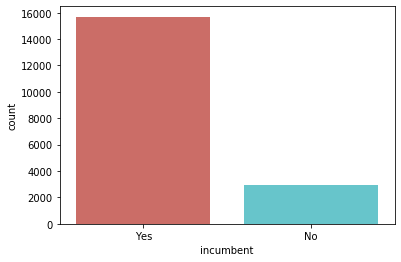

In [24]:
sb.countplot(x='incumbent',data=data1, palette='hls')

# NULL VALUES

Checking for the null values if any :

In [25]:
data1.isnull().sum()

congress          0
chamber           0
bioguide          0
firstname         0
middlename     3536
lastname          0
suffix        16937
birthday          0
state             0
party             0
incumbent         0
termstart         0
age               0
dtype: int64

As we can see there are null values we have to remove them

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18635 entries, 0 to 18634
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   congress    18635 non-null  int64  
 1   chamber     18635 non-null  object 
 2   bioguide    18635 non-null  object 
 3   firstname   18635 non-null  object 
 4   middlename  15099 non-null  object 
 5   lastname    18635 non-null  object 
 6   suffix      1698 non-null   object 
 7   birthday    18635 non-null  object 
 8   state       18635 non-null  object 
 9   party       18635 non-null  object 
 10  incumbent   18635 non-null  object 
 11  termstart   18635 non-null  object 
 12  age         18635 non-null  float64
dtypes: float64(1), int64(1), object(11)
memory usage: 1.8+ MB


# REMOVING THE ATTRIBUTES WHICH ARE NOT USEFULL

In [27]:
data1 = data1.drop(['congress','bioguide','firstname','middlename','lastname','suffix','birthday','state','party','termstart'], 1)
data1.head()

,chamber,incumbent,age
0,house,Yes,85.9
1,house,Yes,83.2
2,house,Yes,80.7
3,house,Yes,78.8
4,house,No,78.3


# Creating a dummy variable because are target variable should be in a binary format

Then  we need to do is reformat the  variables so that they work with the model. we need to reformat the target variable 'incumbent' and 'chamber' into numeric variable

In [28]:
incumbent_b = pd.get_dummies(data1['incumbent'],drop_first=True)
incumbent_b.head()

,Yes
0,1
1,1
2,1
3,1
4,0


In [29]:
chamber_b=pd.get_dummies(data1['chamber'])
chamber_b.head()

,house,senate
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [30]:
data1 = data1.drop(['chamber', 'incumbent'],1)
data1.head()

,age
0,85.9
1,83.2
2,80.7
3,78.8
4,78.3


In [31]:
data2 = pd.concat([data1,chamber_b,incumbent_b],axis=1)
data2.head()

,age,house,senate,Yes
0,85.9,1,0,1
1,83.2,1,0,1
2,80.7,1,0,1
3,78.8,1,0,1
4,78.3,1,0,0


# now the data set is in a proper format

In [32]:
data_f = data2.rename(columns={'Yes': 'incumbent_n'}, index={'ONE': 'one'})
data_f.head()

,age,house,senate,incumbent_n
0,85.9,1,0,1
1,83.2,1,0,1
2,80.7,1,0,1
3,78.8,1,0,1
4,78.3,1,0,0


# checking for the corelation between the variables

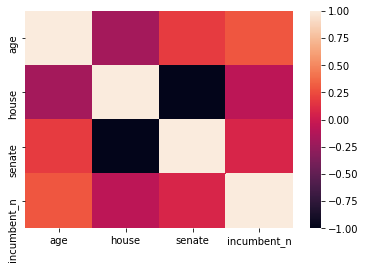

In [33]:
sb.heatmap(data_f.corr())  

# Training and testing phase

In [34]:
L = data_f[['age','house','senate']].values
B = data_f['incumbent_n'].values

In [40]:
L_train, L_test, B_train, B_test = train_test_split(L, B, test_size = .3, random_state=25)

# MODEL DEPLOYMENT 

In [41]:
LR = LogisticRegression()
LR.fit(L_train, B_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
B_pred = LR.predict(L_test)

# EVALUATION

In [44]:
df = pd.DataFrame({'Actual': B_test, 'Predicted': B_pred})
df

,Actual,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
5586,1,1
5587,1,1
5588,1,1
5589,1,1


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(B_test, B_pred)
confusion_matrix

array([[  40,  827],
       [  10, 4714]])

THE CONFUSION MATEIX SHOWS THAT 40 AND 4714 ARE THE CORRECTLY PREDICTED ,10 AND 827 ARE THE WRONG PREDITICTED

In [51]:
import os

os.system('jupyter nbconvert --to html REGRESSION.ipynb')

0

In [ ]:
import os 
os.system('jupyter nbconvert ')